## **Actividad. Clasificación con Árboles de Decisión**

Vamos a trabajar con un dataset que forma parte de la librería Scikit-Learn

Usaremos:


```
from sklearn.datasets import *
```
para importar los datos.

**Tipos de Vino Italiano**

En esta ocasión se trata de un dataset con información relativa a ciertas características del vino que nos van a ayudar a clasificarlo.
En concreto, veremos que hay tres clases diferentes de vino. 

Los datos son el resultado de un análisis químico de vinos cultivados en la misma región en Italia por tres cultivadores diferentes. Se toman trece medidas diferentes para los diferentes componentes que se encuentran en los tres tipos de vino.

* Alcohol
* Malic acid
* Ash
* Alcalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline

Nos descargamos un objeto dicccionario con diferentes tipos de información. Para más info:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier

### **Lectura del dataset**

In [3]:
from sklearn.datasets import load_wine
data = load_wine()
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### **Conversión a Pandas Dataframe**

In [7]:
df_features = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data.target, columns=["class"])
df_all = pd.concat([df_features, df_target],axis=1)
df_all.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [9]:
df_all.shape

(178, 14)

### **División en Train/Test**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features.values, df_target.values, 
                                                    stratify=df_target.values, 
                                                    random_state=42, test_size=0.3 )
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(124, 13) (124, 1)
(54, 13) (54, 1)


### **Bucle para la selección de "max_depth"**

In [10]:
md_list = []
score_train_list = []
score_test_list = []

for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeClassifier(random_state=0, max_depth=maxdepth)
  tree_model.fit(X_train, y_train)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X_train, y_train))
  score_test_list.append(100.0*tree_model.score(X_test, y_test))

df = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list})

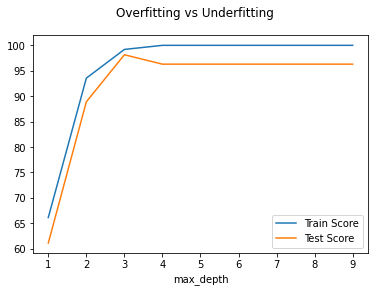

In [11]:
df.set_index("max_depth", inplace=True)
df["score_train"].plot(label="Train Score")
df["score_test"].plot(label="Test Score")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

### **Entrenamiento del modelo**

Aunque el mejor valor de "max_depth" es 3, vamos a seguir el ejemplo con max_depth=2, con objetivos didácticos.

In [20]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=2)
tree_model.fit(X_train, y_train)
pred_train = tree_model.predict(X_train)
pred_test = tree_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*tree_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*tree_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 93.55
Precisión sobre los datos de test: 88.89


### **Generación del Grafo para su análisis**

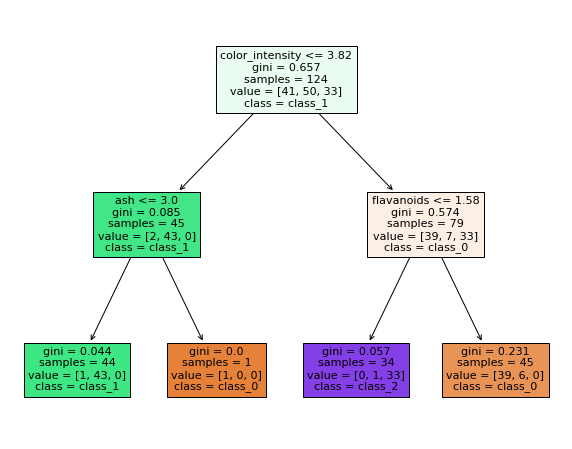

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(10,8))
plot_tree(tree_model, filled=True, max_depth=2, feature_names=df_features.columns, class_names=data.target_names)
plt.show()

### **Cálculo de la Importancia de las Variables**

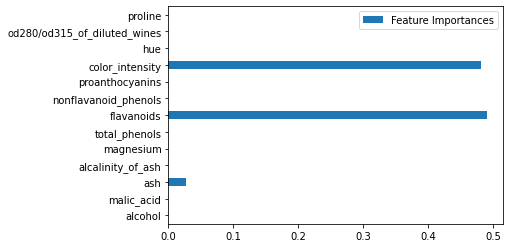

In [22]:
df_imp = pd.DataFrame(tree_model.feature_importances_.reshape(1,-1), columns=df_features.columns, index=["Feature Importances"])
df_imp.T.plot.barh()
plt.legend()
plt.show();

En las siguientes figuras se puede ver lo bien que dividen a las diferentes clases las variables que han sido seleccionadas como las más importantes.

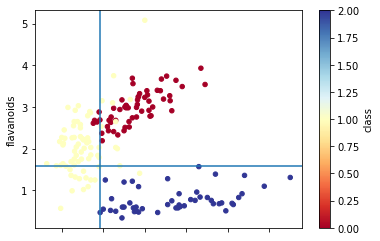

In [18]:
df_all.plot.scatter(x="color_intensity", y="flavanoids", c="class", cmap=plt.cm.RdYlBu)
plt.axvline(3.82)
plt.axhline(1.58)

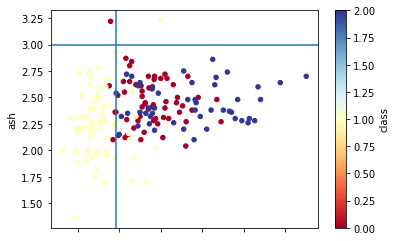

In [19]:
df_all.plot.scatter(x="color_intensity", y="ash", c="class", cmap=plt.cm.RdYlBu)
plt.axvline(3.82)
plt.axhline(3.0)

### **Evaluación del modelo**

In [23]:
from sklearn.metrics import accuracy_score
pred_train = tree_model.predict(X_train)
pred_test = tree_model.predict(X_test)

print (100.0*accuracy_score(pred_train, y_train))
print (100.0*accuracy_score(pred_test, y_test))

93.54838709677419
88.88888888888889


Confusion matrix:



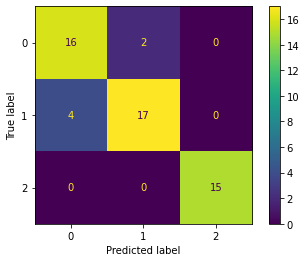

In [24]:
from sklearn.metrics import plot_confusion_matrix
print(f"Confusion matrix:\n")
disp = plot_confusion_matrix(tree_model, X_test, y_test)
plt.show()

No debemos quedarnos sólamente con el valor del "accuracy".

Es muy importante calcular la Matriz de Confusión y analizar sus resultados.

En el tema siguiente veremos más en profundidad la importancia de este análisis.

En este tema nos quedamos con la conclusión de que el modelo no ha tenido ningún problema en predecir la clase 2. Sin embargo, en seis ocasiones ha fallado en la distinción entre las clases 0 y 1. 